In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
df = train_data

In [7]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
df = df.drop_duplicates()
df.shape

(1460, 81)

In [9]:
def preproc(df):
    df = df.drop(['Id', 'Alley', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'Utilities', 'Condition2', 'BldgType', 'RoofMatl',\
                 'MoSold', 'MiscVal', '3SsnPorch', 'CentralAir', 'Heating', 'LotConfig', 'MSSubClass','LandContour', 'LandSlope',\
                 'Condition1', 'HouseStyle', 'OverallCond', 'MasVnrType', 'ExterCond', 'BsmtHalfBath'], axis =1)
    uncorrect = []
    for i in range(df.shape[0]):
        x = np.array(df.iloc[i,:])
        a = 0
        for j in x:
            if np.nan is j:
                a = 1 
        uncorrect.append(a)
    df['Uncorrect'] = uncorrect
    df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
    df['FireplaceQu'] = df['FireplaceQu'].map({'NA' : 0, 'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['New_fare'] = df['Fireplaces'] * df['FireplaceQu']
    df['GarageCond'] = df['GarageCond'].fillna('NA')
    df['GarageQual'] = df['GarageQual'].fillna('NA')
    df['GarageFinish'] = df['GarageFinish'].fillna('NA')
    df['GarageType'] = df['GarageType'].fillna('NA')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(1800)
    df['GarageType'] = df['GarageType'].map({'NA' : 0, 'Detchd':1, 'CarPort':2, 'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
    df['GarageFinish'] = df['GarageFinish'].map({'NA' : 0, 'Unf':1, 'RFn':2, 'Fin':3})
    df['GarageQual'] = df['GarageQual'].map({'NA' : 0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['GarageCond'] = df['GarageCond'].map({'NA' : 0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['Area/cars'] = df.GarageArea/df.GarageCars
    df['New_Garage'] = df.GarageYrBlt*df.GarageFinish
    df['Area/cars'] = df['Area/cars'].fillna(0)
    df['Sold-remod'] = df['YrSold'] - df['YearRemodAdd']
    df = df.drop('YrSold', axis = 1)
    df = df.drop(['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea'], axis = 1)
    df['New_porch'] = df['OpenPorchSF'] + df['WoodDeckSF'] - df['EnclosedPorch'] + df['ScreenPorch']
    df = df.drop(['OpenPorchSF', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch'], axis = 1)
    df['KitchenQual'] = df['KitchenQual'].map({'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['New_kitchen'] = df['KitchenQual'] + df['KitchenAbvGr']
    df = df.drop(['KitchenQual', 'KitchenAbvGr'], axis = 1)
    df['1+2 Fl - low'] = df['1stFlrSF'] + df['2ndFlrSF'] - df['LowQualFinSF']
    df = df.drop(['1stFlrSF','2ndFlrSF',  'LowQualFinSF'], axis = 1)
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
    df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA' : 0, 'Unf':1,  'LwQ':2, 'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
    df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA' : 0, 'Unf':1,  'LwQ':2, 'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
    df['New_BSMT'] = df['BsmtFinType1']*df['BsmtFinSF1'] + df['BsmtFinType2']*df['BsmtFinSF2'] - df['BsmtUnfSF']
    df = df.drop(['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'],axis = 1)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['BsmtQual'] = df['BsmtQual'].fillna('NA')
    df['BsmtCond'] = df['BsmtCond'].fillna('NA')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
    df['SaleType'] = df['SaleType'].map({'Oth' : 0, 'ConLD':1, 'ConLI':2, 'ConLw':3,'Con':4,'COD':5, 'New':6,'VWD':7,'CWD':8,'WD':9})
    df['SaleCondition'] = df['SaleCondition'].map({'Partial' : 0, 'Family':1, 'Alloca':2, 'AdjLand':3,'Abnorml':4,'Normal':5})
    df['PavedDrive'] = df['PavedDrive'].map({'N' : 0, 'P':1, 'Y':2})
    df['Functional'] = df['Functional'].map({'Sal' : 0, 'Sev':1, 'Maj2':2, 'Maj1':3,'Mod':4,'Min2':5,'Min1':6, 'Typ':7})
    df['Electrical'] = df['Electrical'].fillna('NA')
    df['Electrical'] = df['Electrical'].map({'NA':0, 'Mix':1,  'FuseP':2, 'FuseF':3,'FuseA':4,'SBrkr':5})
    df['HeatingQC'] = df['HeatingQC'].map({'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['BsmtQual'] = df['BsmtQual'].map({'NA' : 0, 'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['BsmtCond'] = df['BsmtCond'].map({'NA' : 0, 'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['BsmtExposure'] = df['BsmtExposure'].map({'NA' : 0, 'No':1,  'Mn':2, 'Av':3,'Gd':4})
    df['Foundation'] = df['Foundation'].map({'Wood':1,  'Stone':2, 'Slab':3,'PConc':4,'CBlock':5,'BrkTil':6})
    df['ExterQual'] = df['ExterQual'].map({'Po':1,  'Fa':2, 'TA':3,'Gd':4,'Ex':5})
    df['MSZoning'] = df['MSZoning'].map({'RM':1, 'RP':2, 'RL':3,'RH':4,'I':5,'FV':6,'C (all)':7,'A':8})
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
    df['LotShape'] = df['LotShape'].map({'IR3' : 1, 'IR2':2, 'IR1':3,'Reg':4})
    df['Neighborhood'] = df['Neighborhood'].map({'Veenker':1, 'Timber':2, 'StoneBr':3,'Somerst':4,'SawyerW':5,'Sawyer':6,'SWISU'\
                                                 :7,'OldTown':8,'NWAmes':9, 'NridgHt':10, 'NPkVill':11,'NoRidge':12,'NAmes':13,'Mitchel':14,\
                                                 'MeadowV':15,'IDOTRR':16, 'Gilbert':17, 'Edwards':18, 'Crawfor':19,'CollgCr':20\
                                                 ,'ClearCr':21,'BrkSide':22,'BrDale':23, 'Blueste':24,'Blmngtn':25})
    df['RoofStyle'] = df['RoofStyle'].map({'Shed' : 1, 'Mansard':2, 'Hip':3, 'Gambrel':4, 'Gable':5, 'Flat':6})
    df['Exterior1st'] = df['Exterior1st'].map({'WdShing':1, 'Wd Sdng':2, 'VinylSd':3,'Stucco':4,'Stone':5,'PreCast':6,'Plywood'\
                                                 :7,'Other':8,'MetalSd':9, 'ImStucc':10, 'HdBoard':11,'CemntBd':12,'CBlock':13,'BrkFace':14,\
                                                 'BrkComm':15,'AsphShn':16, 'AsbShng':17})
    df['Exterior2nd'] = df['Exterior2nd'].map({'Wd Shng':1, 'Wd Sdng':2, 'VinylSd':3,'Stucco':4,'Stone':5,'PreCast':6,'Plywood'\
                                                 :7,'Other':8,'MetalSd':9, 'ImStucc':10, 'HdBoard':11,'CmentBd':12,'CBlock':13,'BrkFace':14,\
                                                 'Brk Cmn':15,'AsphShn':16, 'AsbShng':17})
    
    
    
    return df

In [10]:
dff = preproc(df)
dff.head()


,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,...,SalePrice,Uncorrect,New_fare,Area/cars,New_Garage,Sold-remod,New_porch,New_kitchen,1+2 Fl - low,New_BSMT
0,3,65.0,8450,4,20,7,2003,2003,5,3,...,208500,1,0,274.000000,4006.0,5,61,5,1710,4086
1,3,80.0,9600,4,1,6,1976,1976,5,9,...,181500,0,3,230.000000,3952.0,31,298,4,1262,4606
2,3,68.0,11250,3,20,7,2001,2002,5,3,...,223500,0,3,304.000000,4002.0,6,42,5,1786,2482
3,3,60.0,9550,3,19,7,1915,1970,5,2,...,140000,0,4,214.000000,1998.0,36,-237,5,1717,540
4,3,84.0,14260,3,12,8,2000,2000,5,3,...,250000,0,3,278.666667,4000.0,8,276,5,2198,3440


In [11]:
dff[dff.duplicated()]

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,...,SalePrice,Uncorrect,New_fare,Area/cars,New_Garage,Sold-remod,New_porch,New_kitchen,1+2 Fl - low,New_BSMT


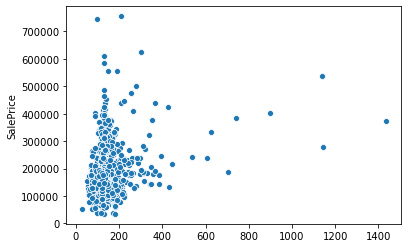

In [12]:
sns.scatterplot(x = df['LotArea']/df['LotFrontage'], y  = df['SalePrice']);

In [13]:
dff[dff['LotFrontage']>200]

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,...,SalePrice,Uncorrect,New_fare,Area/cars,New_Garage,Sold-remod,New_porch,New_kitchen,1+2 Fl - low,New_BSMT
934,3,313.0,27650,2,13,7,1960,2007,6,2,...,242000,0,4,252.5,3920.0,1,0,5,2069,2390
1298,3,313.0,63887,1,18,10,2008,2008,3,4,...,160000,0,12,709.0,6024.0,0,506,6,5642,33398


In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


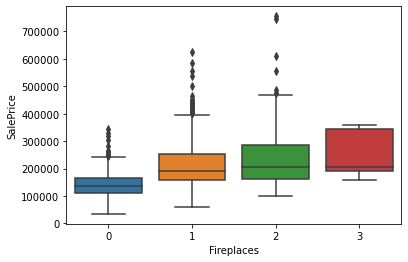

In [15]:
sns.boxplot(x = df['Fireplaces'], y = df['SalePrice']);

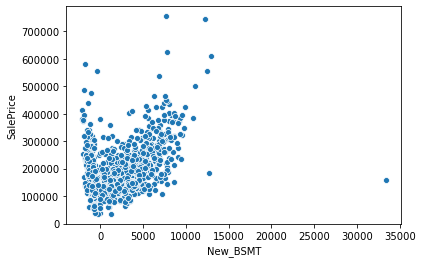

In [16]:
sns.scatterplot(x = dff['New_BSMT']   , y = dff['SalePrice']);

In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   int64  
 4   Neighborhood   1460 non-null   int64  
 5   OverallQual    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   int64  
 9   Exterior1st    1460 non-null   int64  
 10  Exterior2nd    1460 non-null   int64  
 11  MasVnrArea     1460 non-null   float64
 12  ExterQual      1460 non-null   int64  
 13  Foundation     1460 non-null   int64  
 14  BsmtQual       1460 non-null   int64  
 15  BsmtCond       1460 non-null   int64  
 16  BsmtExposure   1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  HeatingQ

In [18]:
dff.corrwith(dff.SalePrice)

MSZoning         0.207122
LotFrontage      0.334901
LotArea          0.263843
LotShape        -0.267759
Neighborhood    -0.178883
OverallQual      0.790982
YearBuilt        0.522897
YearRemodAdd     0.507101
RoofStyle       -0.222405
Exterior1st     -0.119614
Exterior2nd     -0.111485
MasVnrArea       0.472614
ExterQual        0.682639
Foundation      -0.382479
BsmtQual         0.585207
BsmtCond         0.212607
BsmtExposure     0.374696
TotalBsmtSF      0.613581
HeatingQC        0.427649
Electrical       0.223563
GrLivArea        0.708624
BsmtFullBath     0.227122
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
TotRmsAbvGrd     0.533723
Functional       0.107619
Fireplaces       0.466929
FireplaceQu      0.520438
GarageType       0.415283
GarageQual       0.273839
GarageCond       0.263191
PavedDrive       0.231357
SaleType        -0.150948
SaleCondition   -0.292568
SalePrice        1.000000
Uncorrect       -0.485967
New_fare         0.510043
Area/cars   

In [19]:
x = np.array(dff.drop('SalePrice', axis =1))
y = dff['SalePrice']




from sklearn.model_selection import train_test_split
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y, test_size=0.33, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, )
model.fit(train_set_x, train_set_y)
y_predict = model.predict(test_set_x)


In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_set_y, y_predict)
print(accuracy)

NameError: name 'accuracy' is not defined

In [22]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(objective='regression', 
                                       num_leaves=8,
                                       learning_rate=0.005, 
                                       n_estimators=15000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )

In [23]:

model.fit(x, y)
x_test = test_data
x_test = preproc(x_test)


In [24]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   float64
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   LotShape       1459 non-null   int64  
 4   Neighborhood   1459 non-null   int64  
 5   OverallQual    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   RoofStyle      1459 non-null   int64  
 9   Exterior1st    1458 non-null   float64
 10  Exterior2nd    1458 non-null   float64
 11  MasVnrArea     1459 non-null   float64
 12  ExterQual      1459 non-null   int64  
 13  Foundation     1459 non-null   int64  
 14  BsmtQual       1459 non-null   int64  
 15  BsmtCond       1459 non-null   int64  
 16  BsmtExposure   1459 non-null   int64  
 17  TotalBsmtSF    1458 non-null   float64
 18  HeatingQ

In [25]:
x_test = x_test.fillna(0)
x_test = np.array(x_test)
predictions = model.predict(x_test)
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,Id,SalePrice
0,1461,124958.118812
1,1462,163715.988467
2,1463,187979.739082
3,1464,185754.306568
4,1465,184911.073426
...,...,...
1454,2915,78206.295678
1455,2916,73777.385991
1456,2917,165597.753542
1457,2918,119341.711154
